In [1]:
%alias Notung java -jar /home/catalin/Downloads/Notung-2.9.jar
%alias PhyML /home/catalin/Downloads/PhyML-3.1_linux64

from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('colheader_justify', 'left')
pd.options.display.max_rows = 200
#d.style.set_properties(**{'text-align': 'left'})

In [3]:
ls data/

Candidatus_Heimdallarchaeota.fasta*    Lokiarchaeum.fasta*
Candidatus_Odinarchaeota_LCB_4.fasta*  Thorarchaeota_archaeon_AB_25.fasta*
Lokiarchaeota_archaeon_CR_4.fasta*     Thorarchaeota_SMTZ-45.fasta*


In [4]:
ls outgroup/

Bathyarchaeota-archaeon.fasta*  Metallosphaera-yellowstonensis.fasta*
Crenarchaeota-archaeon.fasta*


In [21]:
cat data/* > alltaxa.fasta

In [60]:
cat outgroup/* >> alltaxa.fasta

In [5]:
!head Orthogroups.txt -n 2

OG0000000: KKK40223.1 KKK40226.1 KKK40341.1 KKK40369.1 KKK40453.1 KKK40454.1 KKK40457.1 KKK40672.1 KKK40831.1 KKK40851.1 KKK41091.1 KKK41097.1 KKK41155.1 KKK41182.1 KKK41219.1 KKK41852.1 KKK41853.1 KKK41975.1 KKK42155.1 KKK42259.1 KKK42368.1 KKK42474.1 KKK42607.1 KKK42609.1 KKK42647.1 KKK42824.1 KKK42845.1 KKK42847.1 KKK42849.1 KKK42857.1 KKK42860.1 KKK43026.1 KKK43031.1 KKK43373.1 KKK43455.1 KKK43456.1 KKK43498.1 KKK43967.1 KKK44032.1 KKK44068.1 KKK44114.1 KKK44255.1 KKK44343.1 KKK44406.1 KKK44444.1 KKK44492.1 KKK44552.1 KKK44703.1 KKK44706.1 KKK44775.1 KKK44939.1 KKK45081.1 KKK45140.1 KKK45196.1 KKK45299.1 KKK45421.1 KKK45512.1 KKK46057.1 KKK46087.1 KKK46108.1 KKK46109.1 KKK46113.1 KKK46288.1 KKK46293.1 KKK46406.1 KKK46410.1 KKK46541.1 KXH69871.1 KXH70892.1 KXH72051.1 KXH72871.1 KXH73274.1 KXH73278.1 KXH74422.1 KXH76323.1 KXH76619.1 KXH77151.1 MBS85073.1 MBS85200.1 OLS12066.1 OLS12284.1 OLS12298.1 OLS12323.1 OLS12338.1 OLS12375.1 OLS12668.1 OLS12906.1 OLS12963.1 OLS12966.1 OLS12978.1

In [78]:
cat Orthogroups1545.txt | grep "OG" | wc -l

11013


In [23]:
orthogroups14=orthogroups

In [295]:
t=open("Orthogroups.txt").read()
x="".join(t.split("\n")).split()
orthogroups15=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))

t=open("Orthogroups1.4.txt").read()
x="".join(t.split("\n")).split()
orthogroups14=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))

t=open("Orthogroups1545.txt").read()
x="".join(t.split("\n")).split()
orthogroups1545=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))

t=open("Orthogroups13.txt").read()
x="".join(t.split("\n")).split()
orthogroups13=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))

t=open("Orthogroups1345.txt").read()
x="".join(t.split("\n")).split()
orthogroups1345=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))


print(len(orthogroups),"orthogroups in total")

11013 orthogroups in total


In [106]:
orthogroups=orthogroups13
print(sum(np.array(list(map(len,orthogroups)))>1), "orthogroups with more than one protein")

2480 orthogroups with more than one protein


In [107]:
print(sum(np.array(list(map(len,orthogroups)))==9), "orthogroups with exactly 9 proteins")

139 orthogroups with exactly 9 proteins


In [108]:
# good orthogroups containing 9 elements and all 7 unique 3-letter seqids.
# 2 pairs of the selected species have the same 3-letter identifier at the 
# beggining of the sequences, so 7 is the max number of different 3-letter ids in an orthogroup.
# some of these good ids will contain orthogroups from less than 9 species

goodids=[i for i in range(len(orthogroups)) if len(orthogroups[i])==9 
                                           and len(set([p[:3] for p in orthogroups[i]]))>6]
print(goodids)

[404, 405, 408, 409, 412, 415, 419, 422, 423, 425, 428, 429, 430, 434, 435, 438, 439, 441, 442, 443, 446, 447, 451, 452, 454, 456, 461, 462, 463, 464, 466, 472, 475, 476, 477, 479, 480, 483, 488, 497, 499, 501, 502, 504, 505, 506, 508, 509]


In [109]:
len(goodids)

48

In [ ]:
# after finding these orthogroups, I realised that Orthofinder outputs SingleCopyOrthogroups.txt,
# which contains just the correct 38 orthogroups with exactly one protein from each species.

In [4]:
def parse(ogindex):
    orthogroup=orthogroups[ogindex]
    i=10
    names=[]
    idsset=[]
    f=open("OGfastas/orthogroup"+str(ogindex)+".fasta","w+")
    for ID in orthogroup:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==ID:
                f.write(">"+s.description+"\n"+str(s.seq)+"\n")
                names+=[s.description[:6]+s.description[-4:-1].replace(" ","-")]
                idsset+=[s.description]
                i+=1
    species=len(set(map(lambda x:x.split("[")[-1], idsset)))
    print(len(orthogroup),"proteins from",species, "species in orthogroup number",ogindex)
    d=pd.DataFrame([[i[:11]," ".join(i.split('[')[:-1])[11:],i.split('[')[-1][:-1]] for i in idsset],columns=["id","protein","species"])
    d["Orthogroup"]=ogindex
    f.close()
    return d.sort_values(by=["protein","species"])

In [5]:
def parseortho(orthogroup):
    i=10
    names=[]
    idsset=[]
    f=open("OGfastas/orthogroup"+str(ogindex)+".fasta","w+")
    for ID in orthogroup:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==ID:
                f.write(">"+s.description+"\n"+str(s.seq)+"\n")
                names+=[s.description[:6]+s.description[-4:-1].replace(" ","-")]
                idsset+=[s.description]
                i+=1
    species=len(set(map(lambda x:x.split("[")[-1], idsset)))
    print(len(orthogroup),"proteins from",species, "species in orthogroup number",ogindex)
    d=pd.DataFrame([[i[:11]," ".join(i.split('[')[:-1])[11:],i.split('[')[-1][:-1]] for i in idsset],columns=["id","protein","species"])
    d["Orthogroup"]=ogindex
    f.close()
    return d.sort_values(by=["protein","species"])

# Visualize the protein alignments of these orthogroups by adding the sequences to a fasta file, aligning it with MAFFT, and opening the alignment in ClustalX. For that, rerun the following cells, either iterating or manually changing $ogindex$:

In [9]:
#iterate to check all orthogroups:
i=0
ogindex=goodids[i]
i+=1

#to set manually
ogindex=

parse(ogindex)

162 proteins from 6 species in orthogroup number 0


In [13]:
print(list(df.protein))

['GTP-binding domain protein ', 'GTP-binding protein ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor ', 'GTPase KRas precursor, partial ', 'Rab GTPase ', 'Rab18/RabC-family small GTPase ', 'Ras family protein ', 'Ras family protein ', 'Ras family protein ', 'Ras family protein ', 'Ras family protein, partial ', 'Ras family protein, partial ', 'Transforming protein p29 precursor ', 'Transforming protein p29 precursor ', 'Transforming protein p29 precursor ', 'Transforming protein p29 precursor ', '

In [176]:
ogindexfasta=str(ogindex)+".fasta"
!mafft --genafpair --quiet --maxiterate 10000 OGfastas/orthogroup$ogindexfasta > OGfastas/aligned$ogindexfasta
!clustalx OGfastas/aligned$ogindexfasta

Sequence format is Pearson
Sequence 1: EHP69493.1   250 aa
Sequence 2: KKK44869.1   250 aa
Sequence 3: KON33356.1   250 aa
Sequence 4: KXH71619.1   250 aa
Sequence 5: KXH76417.1   250 aa
Sequence 6: MBS85711.1   250 aa
Sequence 7: OLS13299.1   250 aa
Sequence 8: OLS31600.1   250 aa
Sequence 9: PIU60182.1   250 aa
Sequence format is Pearson
Sequences assumed to be PROTEIN


In [65]:
d={}
# These orthogroups have exactly one sequence from each organism
# and their alignments look good.
# To reconstrunct the species tree, we concatenate them:
bestogs=[390,403,416,417,418,421] 
for best in bestogs:
    for seqid in orthogroups[best]:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==seqid:
                species=s.description.split("[")[-1]
                try: d[species]+=str(s.seq)
                except KeyError:
                    d[species]=str(s.seq)

In [70]:
names={'Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9]': 'C.Bathy-O',
 'Candidatus Heimdallarchaeota archaeon]': 'Heimdal-I',
 'Candidatus Lokiarchaeota archaeon CR_4]': 'C.-Loki-I',
 'Candidatus Odinarchaeota archaeon LCB_4]': 'C.-Odin-I',
 'Candidatus Thorarchaeota archaeon AB_25]': 'ThorAB2-I',
 'Candidatus Thorarchaeota archaeon SMTZ-45]': 'ThorSMT-I',
 'Lokiarchaeum sp. GC14_75]': 'Lokiarc-I',
 'Metallosphaera yellowstonensis MK1]': 'Metallo-O',
 'miscellaneous Crenarchaeota group-6 archaeon AD8-1]': 'Crenarc-O'}

### To reconstruct the species tree, 6 orthogroups that had exactly one protein from each species were chosen, based on how the alignment looked. A moderate alignment quality was preferred, excluding highly conserved orthogroups and orthogroups that had very little sequence similarity. The proteins were added in a parallel multifasta, where the sequence corresponding to each species was obtained by concatenating its 6 proteins from the orthogroups.

In [446]:
allogs=pd.concat([parse(i) for i in [390,403,416,417,418,421]])

9 proteins from 9 species in orthogroup number 390
9 proteins from 9 species in orthogroup number 403
9 proteins from 9 species in orthogroup number 416
9 proteins from 9 species in orthogroup number 417
9 proteins from 9 species in orthogroup number 418
9 proteins from 9 species in orthogroup number 421


In [447]:
allogs

,id,protein,species,Orthogroup
3,KXH69916.1,50S ribosomal protein L24,Candidatus Thorarchaeota archaeon SMTZ-45,390
2,KON34383.1,50S ribosomal protein L24,miscellaneous Crenarchaeota group-6 archaeon AD8-1,390
8,PIU60241.1,50S ribosomal protein L24e,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,390
4,MBS85940.1,50S ribosomal protein L24e,Candidatus Heimdallarchaeota archaeon,390
6,OLS17879.1,50S ribosomal protein L24e,Candidatus Odinarchaeota archaeon LCB_4,390
7,OLS26623.1,50S ribosomal protein L24e,Candidatus Thorarchaeota archaeon AB_25,390
1,KKK45846.1,50S ribosomal protein L24e,Lokiarchaeum sp. GC14_75,390
5,OLS13407.1,large subunit ribosomal protein L24e,Candidatus Lokiarchaeota archaeon CR_4,390
0,EHP69532.1,ribosomal protein L24E,Metallosphaera yellowstonensis MK1,390
8,PIU60057.1,30S ribosomal protein S11,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,403


In [251]:
f=open("OGfastas/concatenatedforspecies.fasta","w+")
for i in d:
    f.write(">"+names[i]+"\n"+d[i]+"\n")
f.close()
!cat OGfastas/concatenatedforspecies.fasta

>Metallo-O
MVSSHRCSFCGTEIPPGTGMMYVKNDGTILWFCSSKCRKYMLIQRKDAKRLKWTEAYSRVRMSSRREIRWGLARIYASQNNTIITITDITGAEIISRASGGMVVKADREKPSPYAAMLAAGRAASEALDKGLMAIHIKVRAPGGAGPKTPGPGAQPAIRSLARSGFIIGRIEDVTPIPHDTIRRPGGRRGRRVMRVLEYDERRNYLRLYVEDEDDLWLLHTILTKGDVVIARTTRDVSMGNESRRIPMTIQLRVEFTEFQSYTGRLRIHGIVEDAPEKFGIKGSHHTINLDLGEEIVIVKPWTKAQLERIEREARKRSKNMIVLVDQDELLIAIPMEQGIKILVERALQGINEQTESLEDVAKDVAEEITQFANQYQPEALILAGPGPFKEIVKDMLRVKARIYVDSVSTASRAGLAEILKRDIIDQVMRDYSISKSTKQLERALGLMARDSGLVVYGLEETREASTYGAVETLLVSEDLITDDEKRSVIEEVMNLVESKGGNVMIVPKDSPVYHQLKALSGIIGILRFRYKMTSLKYVIKLTFEVEGSVDKPDVIGAIFGQTENLFGQEFDLRELQDKGRLGRIVVEMKTKGGKSEGYIEIPSNLDKVETALIASMVESVEKVGPYNAKFVLKEIEDVRAEKLKKIIERAKEILATWTREKNLDIKEVMNEISGAVKTGELIEFGPDRLPAGPDVYSDPNLIIVEGRADIINLLRYGYRNTVAVEGASGKIQQSVVDLAKTKKTVIAFLDGDHGGDLILKELLNSNVKIDYVARAPVGREVEELTGKEIAKALSNMIPLTQYLKKQQEVLASPQRMEEAQSQQAVQLVEQPKKEIEIQIPQAAIEEIKKLPGTLEGIIFDENWRPVEKVQVRDIISKLENMSNGNVSFIVFDGVITQRLLELASSKNVKMIVGVRIGGINKKPENVKILTLSDVIGLMLEGIRDAVRKFLGGTTSYDVAVDEFIKDLQKALISSDVQVKLVFSLTNKI

In [268]:
!mafft --genafpair --quiet --maxiterate 10000 OGfastas/concatenatedforspecies.fasta > OGfastas/alignedconcatenatedforspecies.fasta

In [260]:
!seqret -auto -sprotein1 -sequence fasta::OGfastas/alignedconcatenatedforspecies.fasta -outseq phylip::OGfastas/alignedconcatenatedforspecies.phy

In [261]:
!cat OGfastas/alignedconcatenatedforspecies.phy

 9 1878
Metallo-O MVSSHRCSFC GTEIPPGTGM MYVK-NDGTI LWFCSSKCRK YMLIQRKDAK
Lokiarc-I MVKVKKCSFC GWDIPIGRGM MYIK-KDGTI FNFCTKKCRK ALIVYKKKAR
Crenarc-O MPKPKKCSFC GNDFPSGKGM IYVK-NDGTL LWFCSSKCRK SSLNFKRDSR
ThorSMT-I MVGTQRCVFC EKDIEPGTGL AFVQTKDGSV LWFCSNKCKV ARLKRRMKPR
Heimdal-I MIRDYECSFC GKDIDRGTGM MYVK-LDGSI LRFCSKKCRI SQVNHKRNPR
C.-Loki-I MVKSRNCDFC GKPIQPGKGT IYVK-NDGIV WNFCTRRCRV LKIRYKKNPR
C.-Odin-I M-RIFKCSFC GDDIQVGKGL TYFK-IDGTP LHFCSSKCKK SLLLYNRKPR
ThorAB2-I MVGTQRCSFC GKDIEPGTGS AFVQTKDGAV FWFCSNKCKV NRLKRRMKPR
C.Bathy-O MPRPRKCSFC GNDFPAGTGM MYVK-NDGSI LWFCSSKCRK SS-KFGRDAR

          RLKWTEAYSR V--------- ----RMS--- ---------- ----------
          KTRWTAHYGK E--------- -----MS--- ---------- ----------
          KFKWTTYFGK EEKG------ ---KGMS--- ---------- ----------
          ATKWTKGFQK GGK------- ---AKMS--- ---------- ----------
          KLKWTTKYER K--------- ----YMSE-- EEIKTEQMEP EITEEVIDTQ
          KAPWTKFYKQ G--------- -----MQ--- ---------- ----------
          RVKWTK

In [265]:
!clustalx OGfastas/alignedconcatenatedforspecies.fasta

Sequence format is Pearson
Sequence 1: Metallo-O   1878 aa
Sequence 2: Lokiarc-I   1878 aa
Sequence 3: Crenarc-O   1878 aa
Sequence 4: ThorSMT-I   1878 aa
Sequence 5: Heimdal-I   1878 aa
Sequence 6: C.-Loki-I   1878 aa
Sequence 7: C.-Odin-I   1878 aa
Sequence 8: ThorAB2-I   1878 aa
Sequence 9: C.Bathy-O   1878 aa
Sequence format is Pearson
Sequences assumed to be PROTEIN


In [266]:
%PhyML -i OGfastas/alignedconcatenatedforspecies.phy -d aa -s BEST







                                 ..........................                                      
 ooooooooooooooooooooooooooooo        CURRENT SETTINGS        ooooooooooooooooooooooooooooooooooo
                                 ..........................                                      

                . Sequence filename:				 alignedconcatenatedforspecies.phy
                . Data type:					 aa
                . Alphabet size:				 20
                . Sequence format:				 interleaved
                . Number of data sets:				 1
                . Nb of bootstrapped data sets:			 0
                . Compute approximate likelihood ratio test:	 yes (SH-like branch supports)
                . Model name:					 LG
                . Proportion of invariable sites:		 0.000000
                . Number of subst. rate categs:			 4
                . Gamma distribution parameter:			 estimated
                . 'Middle' of each rate class:			 mean
                . Amino acid equilibri

In [271]:
Notung -g OGfastas/alignedconcatenatedforspecies.phy_phyml_tree.txt

2	1
2	2


In [438]:
def stringhits(stringlist):
    tmp=[]
    for string in stringlist:
        alltaxa=SeqIO.parse("alltaxa.fasta","fasta")
        for i in alltaxa:
            if string.lower() in i.description.lower():
                tmp+=[i.description]
                
    stringhits=[i[:10] for i in tmp]
    global commonogs
    commonogs=[]
    for j in stringhits:
        for og in range(len(orthogroups)):
            if j in orthogroups[og]:
                commonogs+=[og]
    
    plt.figure(figsize=[19,6])
    sns.countplot(commonogs)
    plt.title("Occurence of  '"+"' or '".join(stringlist)+"'  in different orthogroups",fontsize=15)
    plt.xlabel("Orthogroup ID",fontsize=15)
    plt.ylabel("count",fontsize=15)
    plt.xticks(fontsize=14)
    plt.show()


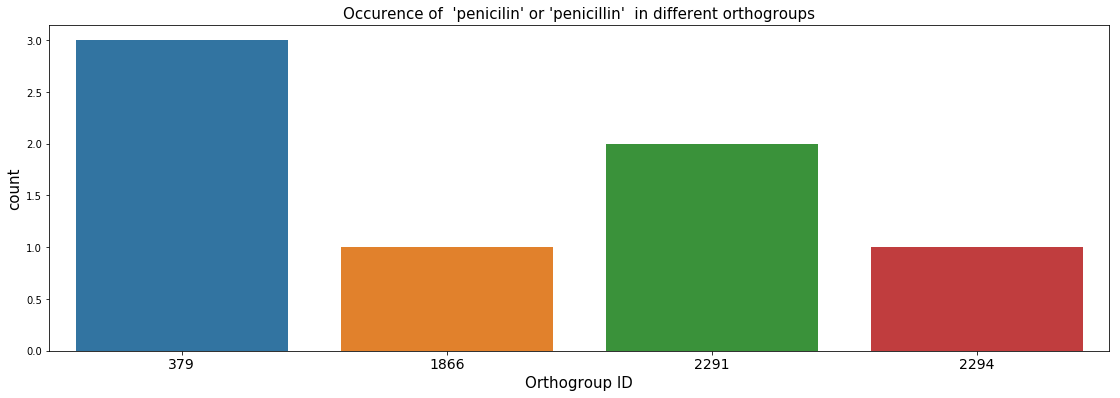

In [443]:
stringhits(["penicilin","penicillin"])

In [444]:
allogs=pd.concat([parse(i) for i in set(commonogs)])

10 proteins from 3 species in orthogroup number 379
3 proteins from 2 species in orthogroup number 1866
2 proteins from 2 species in orthogroup number 2291
2 proteins from 2 species in orthogroup number 2294


In [445]:
print(set(commonogs))
penicillins=allogs[allogs.protein.str.contains("penicil")].sort_values(by="Orthogroup")
penicillins

{379, 1866, 2291, 2294}


,id,protein,species,Orthogroup
4,KKK45547.1,putative penicillin-binding protein PbpX,Lokiarchaeum sp. GC14_75,379
5,KKK45576.1,putative penicillin-binding protein PbpX,Lokiarchaeum sp. GC14_75,379
2,OLS22977.1,putative penicillin-binding protein PbpX,Candidatus Thorarchaeota archaeon AB_25,1866
0,OLS14029.1,penicilin amidase,Candidatus Lokiarchaeota archaeon CR_4,2291
1,OLS14006.1,putative penicillin-binding protein 2,Candidatus Lokiarchaeota archaeon CR_4,2294


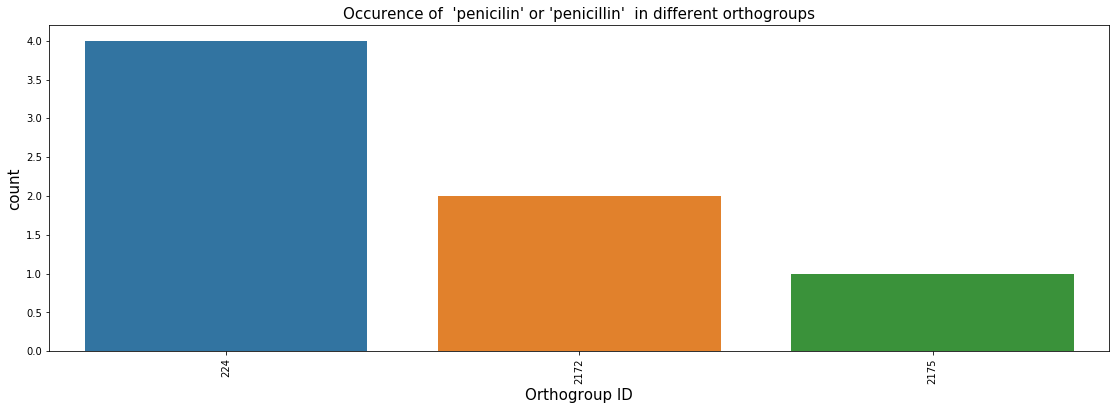

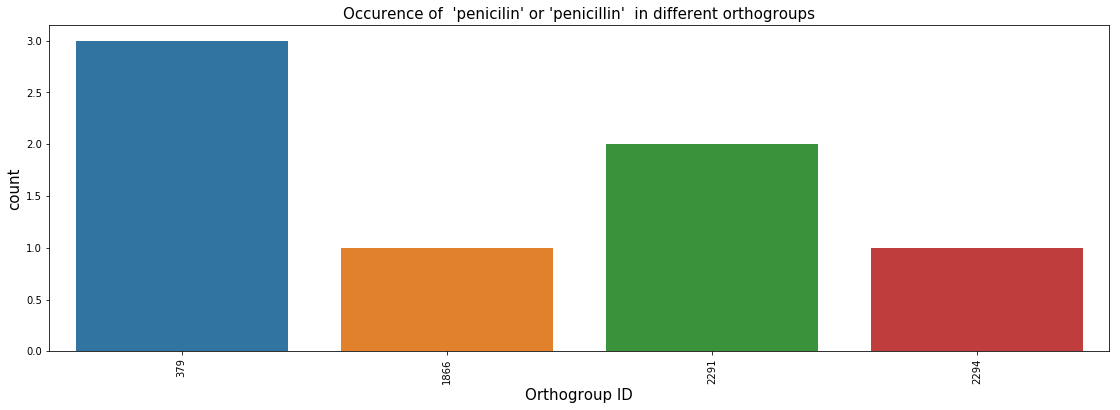

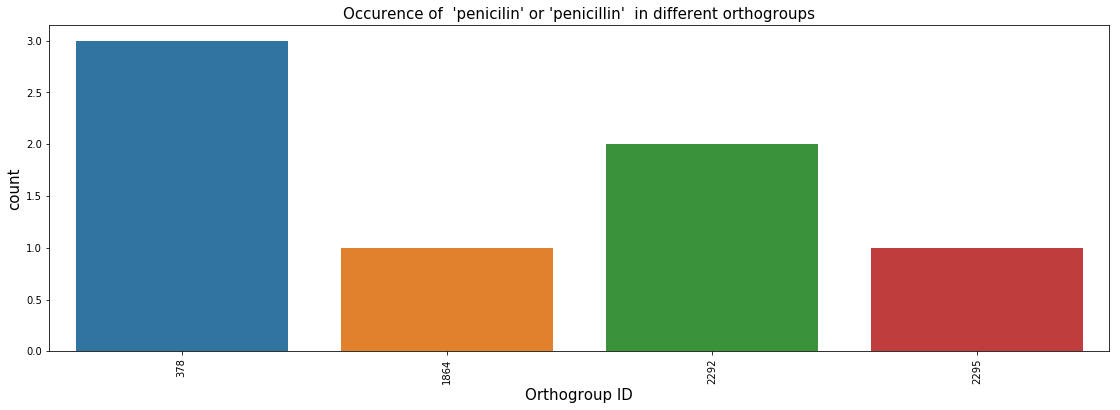

In [75]:
orthogroups=orthogroups14
stringhits(["penicilin","penicillin"])
orthogroups=orthogroups15
stringhits(["penicilin","penicillin"])
orthogroups=orthogroups1545
stringhits(["penicilin","penicillin"])

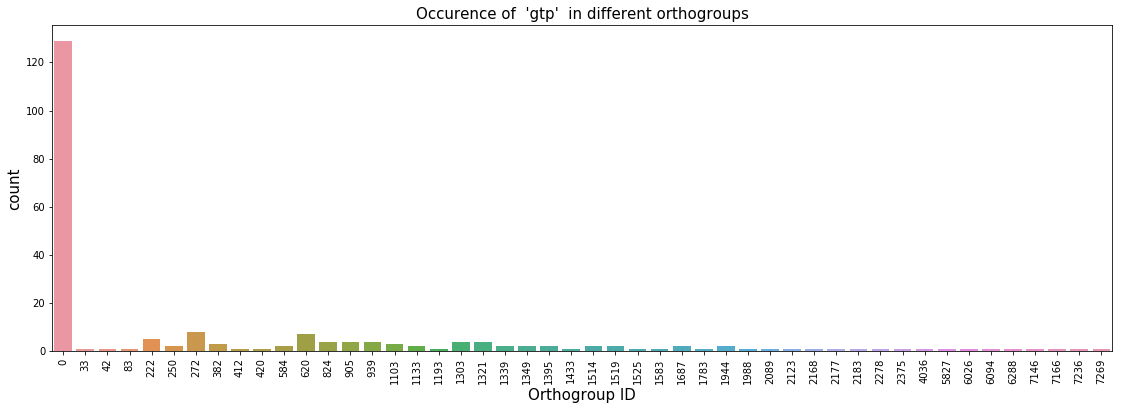

48
162 proteins from 6 species in orthogroup number 0


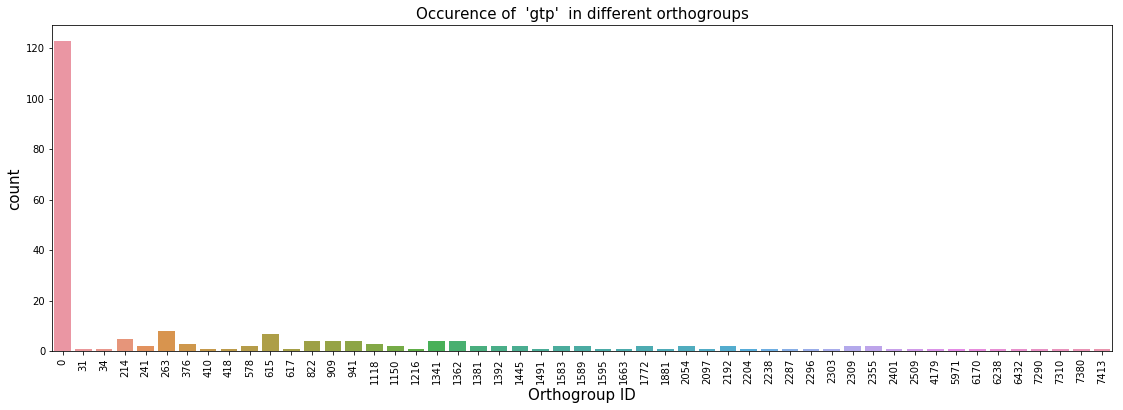

51
156 proteins from 6 species in orthogroup number 0


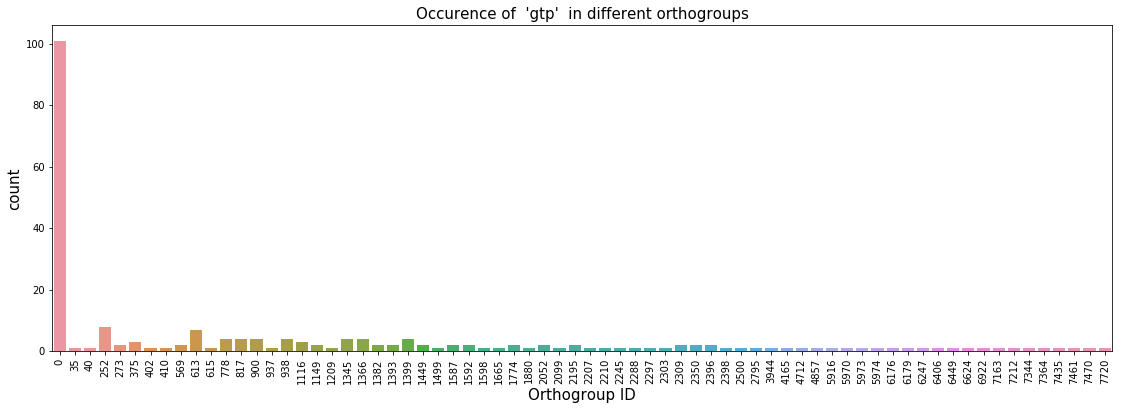

70
127 proteins from 6 species in orthogroup number 0


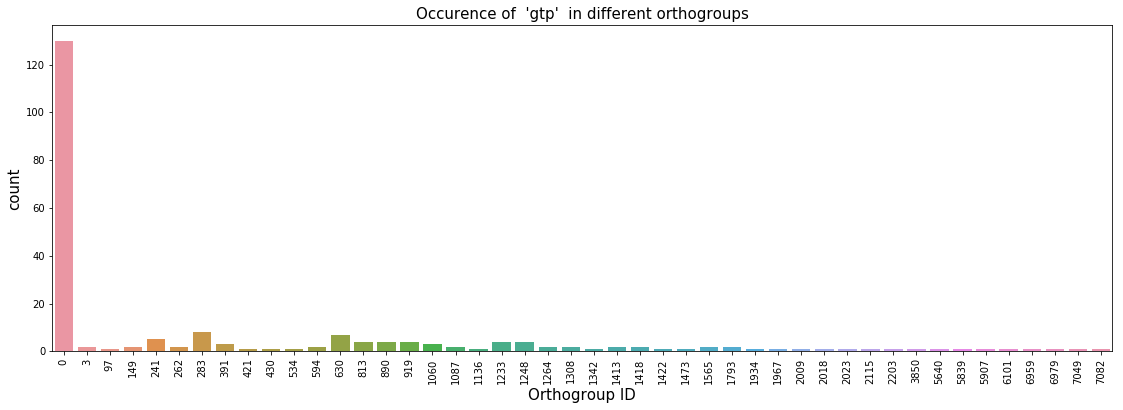

46
170 proteins from 7 species in orthogroup number 0


In [115]:
orthogroups=orthogroups14
stringhits(["gtp"])
print(len(set(commonogs)))
gtp14=parse(0)
orthogroups=orthogroups15
stringhits(["gtp"])
print(len(set(commonogs)))
gtp15=parse(0)
orthogroups=orthogroups1545
stringhits(["gtp"])
print(len(set(commonogs)))
gtp1545=parse(0)
orthogroups=orthogroups13
stringhits(["gtp"])
print(len(set(commonogs)))
gtp13=parse(0)

In [330]:
orthogroups=orthogroups15

In [608]:
lists = [orthogroups15,orthogroups14,orthogroups13,orthogroups1545,orthogroups1345]
sets = [set(tuple(x) for x in y) for y in lists]
l=[list(i) for i in set.intersection(*sets) if len(i)>1]
print(sum([1 for i in l]))
robustogs=[]
for j in l:
    for i in range(len(orthogroups)):
        if orthogroups[i]==j:
            robustogs+=[i]

1918


In [361]:
print(sorted(robustogs)) #390,403,416,417,418,421

[390, 391, 393, 394, 395, 396, 399, 400, 401, 402, 403, 405, 406, 407, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 426, 427, 428, 429, 430, 431, 432, 434, 435, 436, 437, 438, 440, 441, 443, 444, 446, 447, 448, 449, 450, 451, 452, 454, 455, 456, 457, 458, 459, 460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 474, 475, 476, 477, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 503, 504, 505, 508, 509, 510, 513, 514, 516, 518, 522]


In [611]:
parse(13)

42 proteins from 9 species in orthogroup number 13


,id,protein,species,Orthogroup
30,OLS18697.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Odinarchaeota archaeon LCB_4,13
33,OLS29464.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Thorarchaeota archaeon AB_25,13
34,OLS30373.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Thorarchaeota archaeon AB_25,13
36,OLS31081.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Thorarchaeota archaeon AB_25,13
38,OLS31092.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Thorarchaeota archaeon AB_25,13
39,OLS31097.1,Oligopeptide transport ATP-binding protein OppD,Candidatus Thorarchaeota archaeon AB_25,13
4,KKK40962.1,Oligopeptide transport ATP-binding protein OppD,Lokiarchaeum sp. GC14_75,13
6,KKK45598.1,Oligopeptide transport ATP-binding protein OppD,Lokiarchaeum sp. GC14_75,13
9,KKK45713.1,Oligopeptide transport ATP-binding protein OppD,Lokiarchaeum sp. GC14_75,13
31,OLS18698.1,Oligopeptide transport ATP-binding protein OppF,Candidatus Odinarchaeota archaeon LCB_4,13


In [387]:
singlecopyorthogroups=['OG0000390', 'OG0000391', 'OG0000394', 'OG0000400', 'OG0000403', 'OG0000413', 'OG0000416', 'OG0000417', 'OG0000418', 'OG0000421', 'OG0000422', 'OG0000427', 'OG0000430', 'OG0000431', 'OG0000433', 'OG0000434', 'OG0000437', 'OG0000438', 'OG0000441', 'OG0000448', 'OG0000449', 'OG0000450', 'OG0000451', 'OG0000454', 'OG0000459', 'OG0000462', 'OG0000465', 'OG0000467', 'OG0000468', 'OG0000471', 'OG0000476', 'OG0000485', 'OG0000487', 'OG0000488', 'OG0000489', 'OG0000491', 'OG0000492', 'OG0000493']
singlecopyorthogroups=[int(i[-3:]) for i in singlecopyorthogroups]

In [434]:
orthogroups=orthogroups15

In [ ]:
#ychf, L-aspartate oxidase

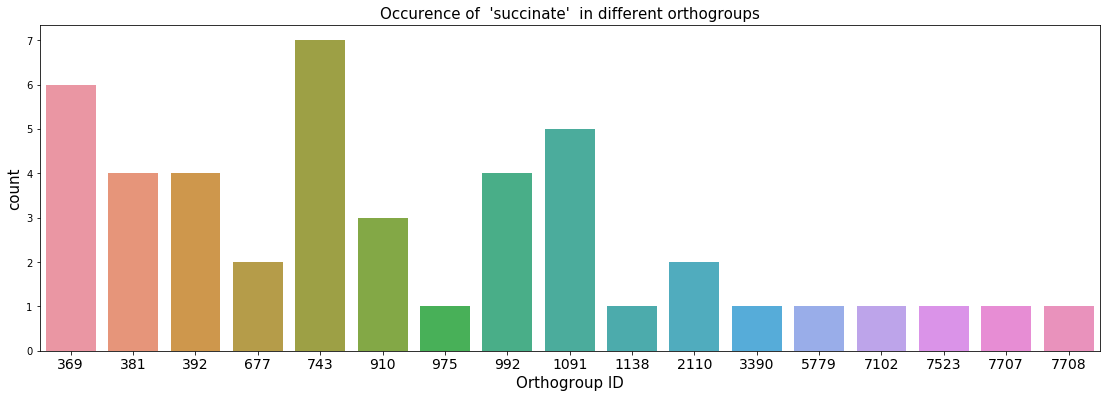

In [535]:
stringhits(["succinate"]) 

In [449]:
parse(369)

10 proteins from 6 species in orthogroup number 369


,id,protein,species,Orthogroup
5,OLS16107.1,L-aspartate oxidase,Candidatus Lokiarchaeota archaeon CR_4,369
6,OLS21048.1,L-aspartate oxidase,Candidatus Thorarchaeota archaeon AB_25,369
3,KKK45769.1,L-aspartate oxidase,Lokiarchaeum sp. GC14_75,369
7,OLS29491.1,Succinate dehydrogenase flavoprotein subunit,Candidatus Thorarchaeota archaeon AB_25,369
8,OLS30198.1,Succinate dehydrogenase flavoprotein subunit,Candidatus Thorarchaeota archaeon AB_25,369
2,KKK42519.1,Succinate dehydrogenase flavoprotein subunit,Lokiarchaeum sp. GC14_75,369
9,PIU58752.1,fumarate reductase (quinol) flavoprotein subunit,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,369
4,MBS85482.1,fumarate reductase/succinate dehydrogenase flavoprotein subunit,Candidatus Heimdallarchaeota archaeon,369
0,EHP70689.1,"ubiquinone-dependent succinate dehydrogenase or fumarate reductase, flavoprotein subunit",Metallosphaera yellowstonensis MK1,369
1,EHP71291.1,"ubiquinone-dependent succinate dehydrogenase or fumarate reductase, flavoprotein subunit",Metallosphaera yellowstonensis MK1,369


In [448]:
parse(578)

8 proteins from 7 species in orthogroup number 578


,id,protein,species,Orthogroup
5,OLS17906.1,Ribosome-binding ATPase YchF,Candidatus Odinarchaeota archaeon LCB_4,578
6,OLS28338.1,Ribosome-binding ATPase YchF,Candidatus Thorarchaeota archaeon AB_25,578
1,KKK42550.1,Ribosome-binding ATPase YchF,Lokiarchaeum sp. GC14_75,578
2,KON32962.1,hypothetical protein AC479_06170,miscellaneous Crenarchaeota group-6 archaeon AD8-1,578
4,KXH70566.1,hypothetical protein AM326_04170,Candidatus Thorarchaeota archaeon SMTZ-45,578
0,EHP69451.1,"putative GTPase, probable translation factor",Metallosphaera yellowstonensis MK1,578
7,PIU59358.1,redox-regulated ATPase YchF,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,578
3,KON34017.1,translation-associated GTPase,miscellaneous Crenarchaeota group-6 archaeon AD8-1,578


11013


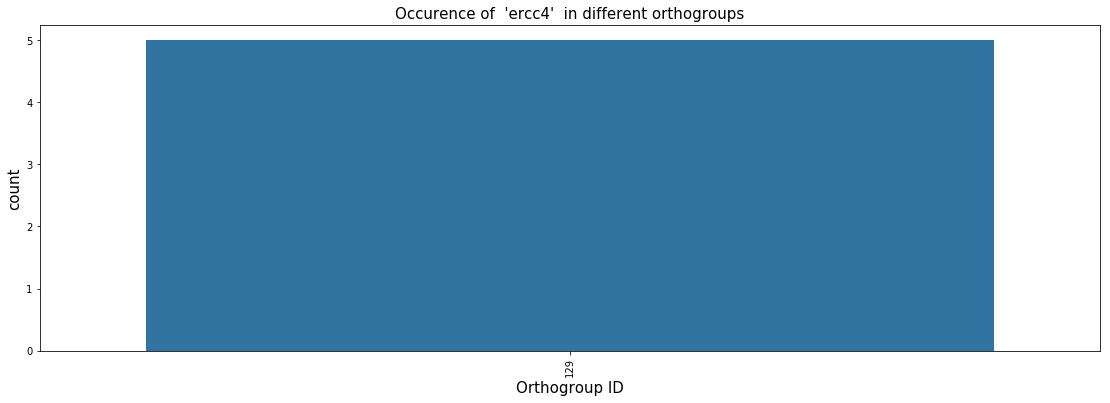

In [184]:
#orthogroups=orthogroups1545
print(len(orthogroups))
stringhits(["ercc4"])
#ercc4 lipoate


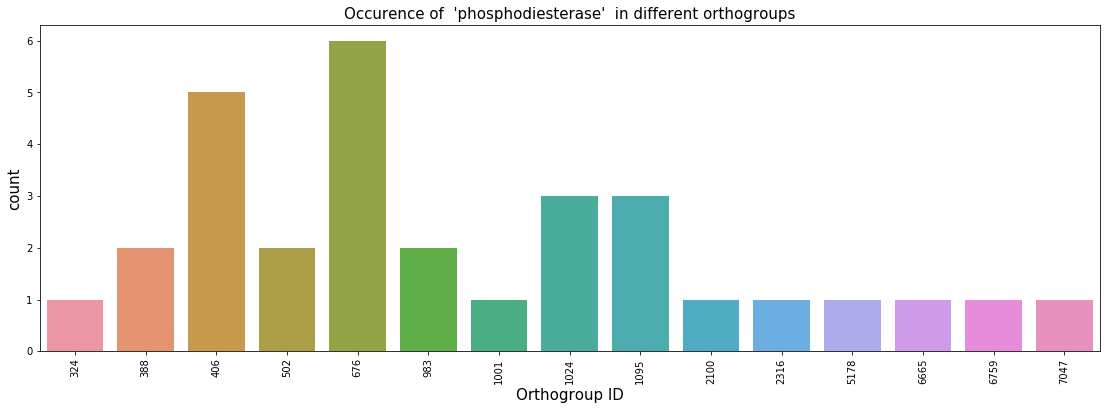

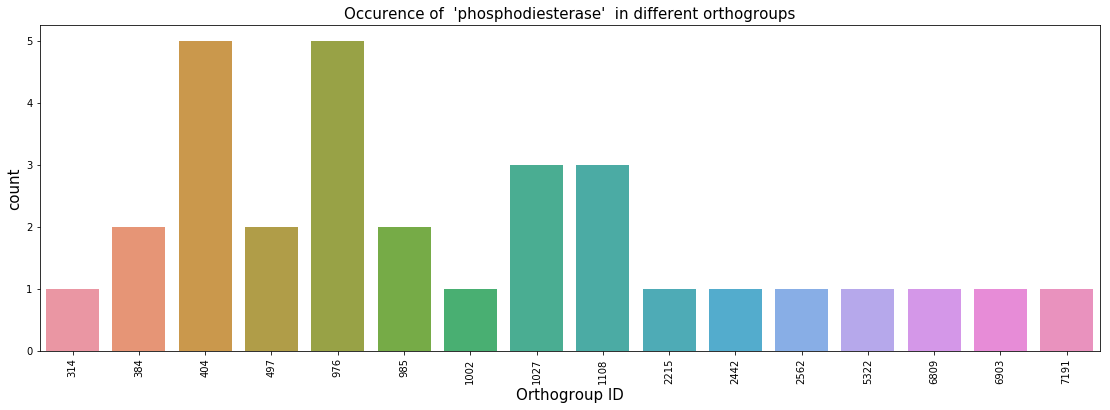

In [39]:
orthogroups=orthogroups14
stringhits(["phosphodiesterase"])
orthogroups=orthogroups15
stringhits(["phosphodiesterase"])

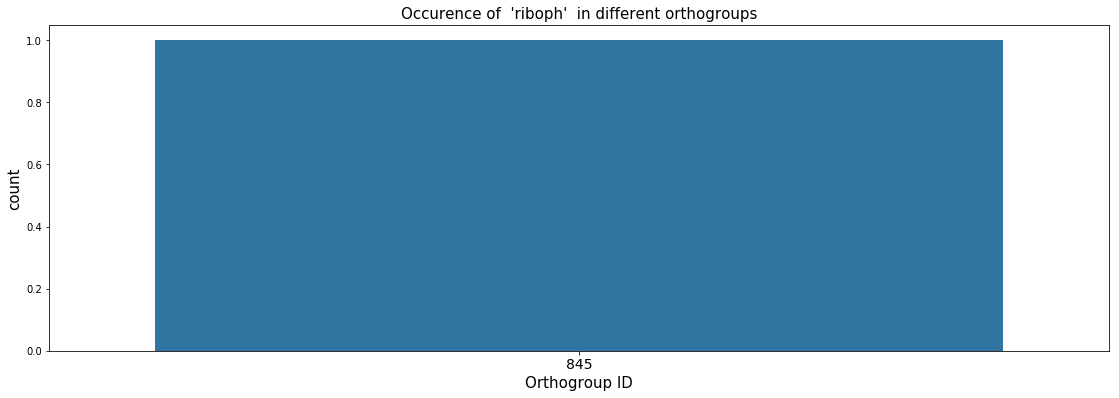

In [604]:
stringhits(["riboph"])

In [564]:
395 in robustogs

True

In [605]:
parse(845)

6 proteins from 6 species in orthogroup number 845


,id,protein,species,Orthogroup
0,KKK41353.1,Ribophorin 1 superfamily protein,Lokiarchaeum sp. GC14_75,845
1,MBS85441.1,hypothetical protein CME83_02620,Candidatus Heimdallarchaeota archaeon,845
5,PIU59598.1,hypothetical protein COS86_03355,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,845
3,OLS17937.1,hypothetical protein OdinLCB4_11710,Candidatus Odinarchaeota archaeon LCB_4,845
2,OLS13459.1,hypothetical protein RBG13Loki_2913,Candidatus Lokiarchaeota archaeon CR_4,845
4,OLS31459.1,hypothetical protein ThorAB25_02870,Candidatus Thorarchaeota archaeon AB_25,845


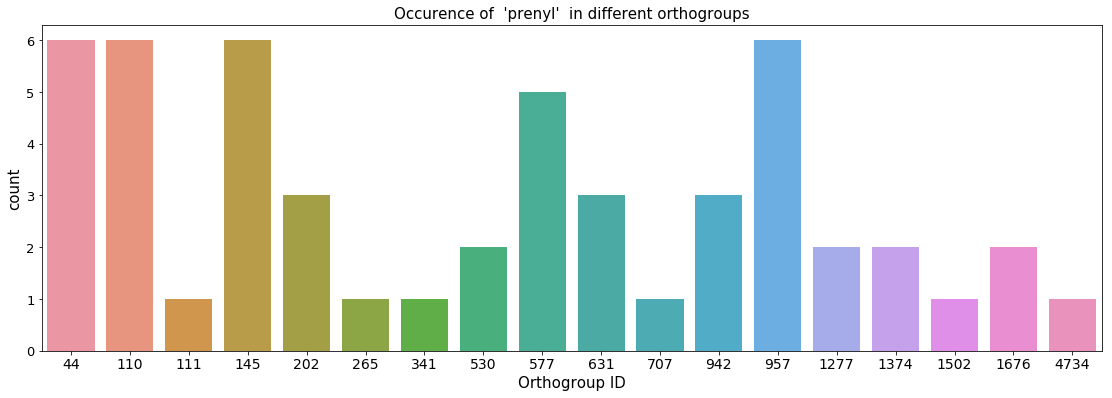

In [758]:
stringhits(["prenyl"])

In [759]:
parse(577)

8 proteins from 7 species in orthogroup number 577


,id,protein,species,Orthogroup
6,OLS21173.1,"(2Z,6E)-farnesyl diphosphate synthase",Candidatus Thorarchaeota archaeon AB_25,577
5,OLS17352.1,"Tritrans,polycis-undecaprenyl-diphosphate synthase (GGDP specific)",Candidatus Odinarchaeota archaeon LCB_4,577
1,KKK42142.1,"Tritrans,polycis-undecaprenyl-diphosphate synthase (GGDP specific)",Lokiarchaeum sp. GC14_75,577
2,KKK46322.1,"Tritrans,polycis-undecaprenyl-diphosphate synthase (GGDP specific)",Lokiarchaeum sp. GC14_75,577
3,KON34016.1,UDP diphosphate synthase,miscellaneous Crenarchaeota group-6 archaeon AD8-1,577
4,OLS12014.1,UDP pyrophosphate synthetase,Candidatus Lokiarchaeota archaeon CR_4,577
7,PIU59359.1,"di-trans,poly-cis-decaprenylcistransferase",Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,577
0,EHP69248.1,undecaprenyl diphosphate synthase,Metallosphaera yellowstonensis MK1,577


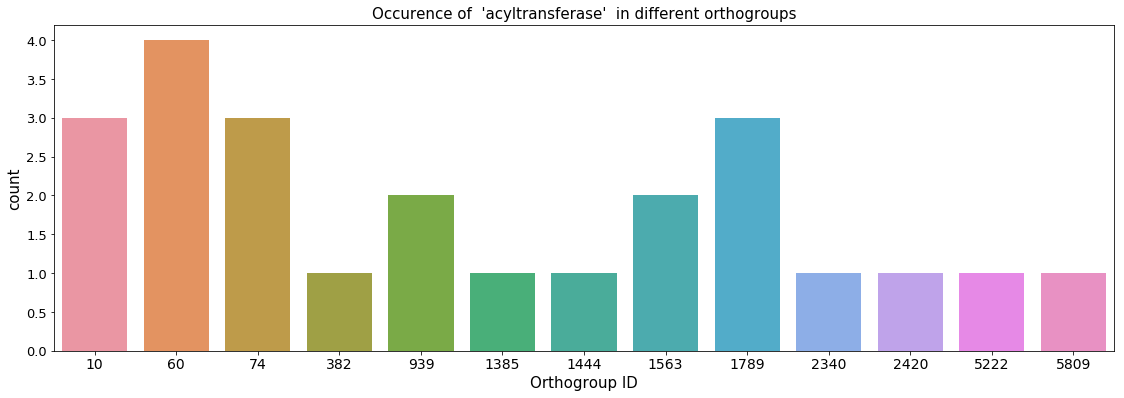

In [751]:
l=stringhits(["acyltransferase"])

In [721]:
## 578 369  395!
def clustal(ogindex):
    og=ogindex
    global filename
    filename="orthogroup"+str(og)
    d={}
    global phynames
    phynames={}
    for seqid in orthogroups[og]:
            seqs=SeqIO.parse("alltaxa.fasta","fasta")
            for s in seqs:
                if s.id==seqid:
                    species=s.description.split("[")[-1]
                    d[species+seqid]=str(s.seq)
                    phynames[seqid[1:]]=names[species]+"-"+" ".join(s.description.split('[')[:-1])[20:]
    f=open("OGfastas/"+filename+".fasta","w+")
    for i in d:
        f.write(">"+i[-9:]+"\n"+d[i]+"\n")
    f.close()
    !mafft --genafpair --maxiterate 10000 OGfastas/$filename\.fasta > OGfastas/$filename\aligned.fasta
    !clustalx OGfastas/$filename\aligned.fasta

In [722]:
orthogroups=orthogroups15
ogindex=578
clustal(ogindex)


nseq =  8
distance =  localgenaf
iterate =  16
cycle =  1
nthread = 0
lastonce = 0
done.
scoremtx = 1
charsize=128
    6 / 8

##### writing hat3
pairlocalalign (aa) Version 7.271 alg=N, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
Loading 'hat3' ... 
done.
done.
scoremtx = 1
charsize=128
Gap Penalty = -1.53, +0.00, +0.00
Loading 'hat2' ... done.
Constructing a UPGMA tree ... 
    0 / 8
done.

Progressive alignment ... 
STEP     7 /7 c
done.
tbfast (aa) Version 7.271 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
Loading 'hat3' ... done.
done.
scoremtx = 1
charsize=128

    0 / 8
Segment   1/  1    1- 417
STEP 002-006-1  rejected..    identical.   
Converged.

done
dvtditr (aa) Version 7.271 alg=A, model=BLOSU

In [715]:
!seqret -auto -sprotein1 -sequence fasta::OGfastas/$filename\aligned.fasta -outseq phylip::OGfastas/$filename\aligned.phy
#!cat OGfastas/$filename\aligned.phy
#t=open("OGfastas/"+filename+"aligned.phy_phyml_tree.txt","w+").read()

In [723]:
phynames

{'HP69451.1': 'Metallo-O-GTPase, probable translation factor ',
 'IU59358.1': 'C.Bathy-O-ulated ATPase YchF ',
 'KK42550.1': 'Lokiarc-I-binding ATPase YchF ',
 'LS17906.1': 'C.-Odin-I-binding ATPase YchF ',
 'LS28338.1': 'ThorAB2-I-binding ATPase YchF ',
 'ON32962.1': 'Crenarc-O-cal protein AC479_06170 ',
 'ON34017.1': 'Crenarc-O-on-associated GTPase ',
 'XH70566.1': 'ThorSMT-I-cal protein AM326_04170 '}

In [728]:
%PhyML -i OGfastas/$filename\aligned.phy -d aa -s BEST







                                 ..........................                                      
 ooooooooooooooooooooooooooooo        CURRENT SETTINGS        ooooooooooooooooooooooooooooooooooo
                                 ..........................                                      

                . Sequence filename:				 orthogroup578aligned.phy
                . Data type:					 aa
                . Alphabet size:				 20
                . Sequence format:				 interleaved
                . Number of data sets:				 1
                . Nb of bootstrapped data sets:			 0
                . Compute approximate likelihood ratio test:	 yes (SH-like branch supports)
                . Model name:					 LG
                . Proportion of invariable sites:		 0.000000
                . Number of subst. rate categs:			 4
                . Gamma distribution parameter:			 estimated
                . 'Middle' of each rate class:			 mean
                . Amino acid equilibrium freque

In [720]:
phynames

{'HP69451.1': 'Metallo-O-putative GTPase, probable translation factor ',
 'IU59358.1': 'C.Bathy-O-redox-regulated ATPase YchF ',
 'KK42550.1': 'Lokiarc-I-Ribosome-binding ATPase YchF ',
 'LS17906.1': 'C.-Odin-I-Ribosome-binding ATPase YchF ',
 'LS28338.1': 'ThorAB2-I-Ribosome-binding ATPase YchF ',
 'ON32962.1': 'Crenarc-O-hypothetical protein AC479_06170 ',
 'ON34017.1': 'Crenarc-O-translation-associated GTPase ',
 'XH70566.1': 'ThorSMT-I-hypothetical protein AM326_04170 '}

In [729]:
t=open("OGfastas/"+filename+"aligned.phy_phyml_tree.txt").read()
tb=t
for i in phynames:
    t=t.replace(i,phynames[i][:26].rstrip().replace(" ","_").replace(",","."))
open("OGfastas/"+filename+"aligned.phy_phyml_tree.txt","w+").write(t)

412

In [573]:
578 in robustogs

True

In [574]:
395 in robustogs

True

In [572]:
parse(578)

8 proteins from 7 species in orthogroup number 578


,id,protein,species,Orthogroup
5,OLS17906.1,Ribosome-binding ATPase YchF,Candidatus Odinarchaeota archaeon LCB_4,578
6,OLS28338.1,Ribosome-binding ATPase YchF,Candidatus Thorarchaeota archaeon AB_25,578
1,KKK42550.1,Ribosome-binding ATPase YchF,Lokiarchaeum sp. GC14_75,578
2,KON32962.1,hypothetical protein AC479_06170,miscellaneous Crenarchaeota group-6 archaeon AD8-1,578
4,KXH70566.1,hypothetical protein AM326_04170,Candidatus Thorarchaeota archaeon SMTZ-45,578
0,EHP69451.1,"putative GTPase, probable translation factor",Metallosphaera yellowstonensis MK1,578
7,PIU59358.1,redox-regulated ATPase YchF,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,578
3,KON34017.1,translation-associated GTPase,miscellaneous Crenarchaeota group-6 archaeon AD8-1,578


In [576]:
parse(395)

9 proteins from 8 species in orthogroup number 395


,id,protein,species,Orthogroup
7,OLS31600.1,Ribose-5-phosphate isomerase A,Candidatus Thorarchaeota archaeon AB_25,395
1,KKK44869.1,Ribose-5-phosphate isomerase A,Lokiarchaeum sp. GC14_75,395
2,KON33356.1,hypothetical protein AC479_04795,miscellaneous Crenarchaeota group-6 archaeon AD8-1,395
4,KXH76417.1,hypothetical protein AM326_02820,Candidatus Thorarchaeota archaeon SMTZ-45,395
3,KXH71619.1,hypothetical protein AM326_11665,Candidatus Thorarchaeota archaeon SMTZ-45,395
5,MBS85711.1,hypothetical protein CME83_04055,Candidatus Heimdallarchaeota archaeon,395
0,EHP69493.1,ribose 5-phosphate isomerase,Metallosphaera yellowstonensis MK1,395
8,PIU60182.1,ribose 5-phosphate isomerase A,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9,395
6,OLS13299.1,ribose-5-phosphate isomerase A,Candidatus Lokiarchaeota archaeon CR_4,395


In [730]:
%Notung -g OGfastas/$filename\aligned.phy_phyml_tree.txt -s OGfastas/species_tree_final.ntg

4	1
4	2
4	3
4	4


In [731]:
%Notung -g OGfastas/orthogroup578aligned.phy_phyml_tree.txt -s OGfastas/species_tree_final.ntg

4	1
4	2
4	3
4	4


In [ ]:
%Notung -g OGfastas/orthogroup395aligned.phy_phyml_tree.txt -s OGfastas/species_tree_final.ntg

4	1
4	2
4	3
4	4


In [580]:
!ls OGfastas/*_tree.txt

OGfastas/aligned150.phy_phyml_tree.txt
OGfastas/concatenatedforspecies.fasta_phyml_tree.txt
OGfastas/concatenatedforspecies.phy_phyml_tree.txt
OGfastas/orthogroup273aligned.phy_phyml_tree.txt
OGfastas/orthogroup294aligned.phy_phyml_tree.txt
OGfastas/orthogroup369aligned.phy_phyml_tree.txt
OGfastas/orthogroup395aligned.phy_phyml_tree.txt
OGfastas/orthogroup406aligned.phy_phyml_tree.txt
OGfastas/orthogroup447aligned.phy_phyml_tree.txt
OGfastas/orthogroup497aligned.phy_phyml_tree.txt
OGfastas/orthogroup578aligned.phy_phyml_tree.txt


In [664]:
orthogroups=orthogroups1545
np.mean([len(orthogroups[i]) for i in range(1000)])

11.067

In [740]:
plt.rcParams.update({'font.size': 13})

Text(0.5,0,'orthogroup index')

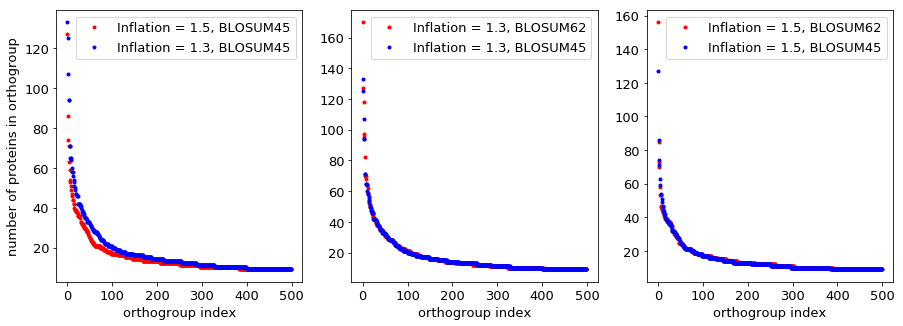

In [741]:
fig,axs=plt.subplots(1,3, figsize=[15,5])
orthogroups=orthogroups1545
axs[0].plot([len(orthogroups[i]) for i in range(500)],"r.",label="Inflation = 1.5, BLOSUM45")
orthogroups=orthogroups1345
axs[0].plot([len(orthogroups[i]) for i in range(500)],"b.",label="Inflation = 1.3, BLOSUM45")
axs[0].legend()
axs[0].set_ylabel("number of proteins in orthogroup")
#plt.title("Size of the top 500 largest orthogroups")
axs[0].set_xlabel("orthogroup index")
orthogroups=orthogroups13
axs[1].plot([len(orthogroups[i]) for i in range(500)],"r.",label="Inflation = 1.3, BLOSUM62")
orthogroups=orthogroups1345
axs[1].plot([len(orthogroups[i]) for i in range(500)],"b.",label="Inflation = 1.3, BLOSUM45")
axs[1].legend()
axs[1].set_xlabel("orthogroup index")

orthogroups=orthogroups15
axs[2].plot([len(orthogroups[i]) for i in range(500)],"r.",label="Inflation = 1.5, BLOSUM62")
orthogroups=orthogroups1545
axs[2].plot([len(orthogroups[i]) for i in range(500)],"b.",label="Inflation = 1.5, BLOSUM45")
axs[2].legend()
axs[2].set_xlabel("orthogroup index")